In [1]:
%load_ext autoreload
%autoreload 2
%run kmeans

# K-means Clustering

The following report contains the Implementation of the k-means algorithm and its implementation details from scratch. The structure of the report is as follows

    1. What is the kmeans algorithm and why do we need it?
    2. What are some of the industrial applications of k-means?
    3. Understanding how k-means works?
    4. k-means pseudocode
    5. Kmeans++ for centroid initialization
    6. Image Compression with k-means++
    7. When k-means clustering fails
    8. Computing similarity matrix from Brieman's random forest
    9. Spectral clustering for separating nested circles

### What is k-means algorithm and why do we need it?

Kmeans helps to understand the data by grouping it based on the similarity between the data points. It is an unsupervised learning algorithm i.e it's a type of algorithm that learns patterns in the dataset without labels. 

Let's take an example, Suppose you opened Netflix to watch a movie. You would find that similar movies are generally arranged in a group. It could be based on genre, director, actors, etc. Like the thriller movies will be kept in one tile, comedy movies will be kept on other tile and so on. You will find that they are forming a group or cluster, where each of the movies is kept within their kind of group forming the clusters.


### What are some of the industry applications of k-means?


**Fraud Detection:** Forming multiple clusters based on users' behavior, personally identifiable information, etc, and then detecting the potential fraudsters based on the fraud rate within every cluster.\
**Newsfeed Recommendation:** Cluster articles based on their similarity.\
**Image Compression:** Generating a compressed image by clustering close pixel values without losing much information. \
**Recommendation Engines:** Clustering to find similar movies and  recommend the most similar movies based on users' interests.\
**Semantic Segmentation:** It is used to identify different regions/objects in an image based on similarity




### Understanding how k-means works?


Let's say we have to separate data in k clusters. We will follow the below steps to generate the appropriate centroids of the clusters

    1. First, we randomly pick k points from the data, called means of the clusters.
    2. Measure the distance of all the points from the means and then assign each point to its closest means.
    3. Update the mean of each cluster with the average of the points assigned to that particular cluster.
    4. Repeat steps 2 and 3 until the means are not changing or we reach the given number of iterations. 

### Kmeans Pseudocode

**Algorithm** Kmeans(X,k)\
Randomly select k points as m<sub>i</sub><sup>t=0</sup> for cluster  C<sup>*</sup><sub>j</sub> as initalization, i $\in$ 1..k\
**repeat**\
    &emsp; **foreach** x $\in$ X do\
    &emsp; &emsp; j<sup>*</sup> = argmin<sub>j</sub>distance(x,m<sub>j</sub><sup>t</sup>) &emsp; &emsp; -closest centroid from the point\
    &emsp; &emsp; Add x to cluster C<sub>j<sup>*</sup></sub><sup>t+1</sup>\
&emsp; **end**\
    &emsp;**for** j = 1..k do\
    &emsp;&emsp;m<sub>i</sub><sup>t+1</sup> = avg(x)<sub>j$\in$ C<sub>j</sub><sup>t+1</sup></sub>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; -recompute clusters\
    &emsp;**end**
t = t + 1\
**until** C<sub>1..k</sub><sup>t</sup> = C<sub>1..k</sub><sup>t-1</sup> &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp;&emsp; -until cluster don't change

Here we will see how k-means works by testing the results on a small sample of generated data. We generated 300 data points with the roughly same number of data points in each of the clusters. We will run our clustering technique to see if the k-mean algorithm can separate all three of them.

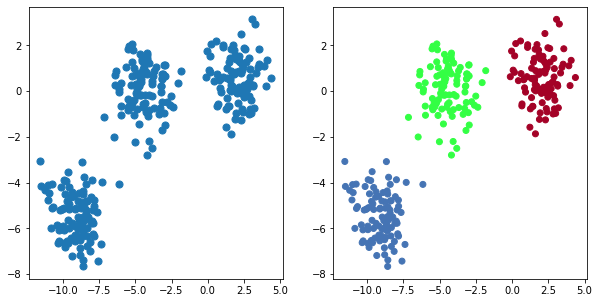

In [2]:
n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
centroids, labels = kmeans(X, 3, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227','#33FF44'])
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.scatter(X[:,0], X[:,1],s=50)
ax2.scatter(X[:,0], X[:,1], c=colors[labels])

As expected this algorithm grouped points that are close to each other in similar clusters. 

### Kmeans++ for centroid initialization

The results of k-means heavily depend on the initialization of means and thus different initialization can result in varying results. To minimize that we further explored k-mean++ for the centroid initialization method. The idea is to choose initial points which are as far apart from each other as possible. It is the same as k-means except for the initialization of centroid is not random.\
The detailed method is as follows for say k clusters

    1. We randomly select one of the points as the centroid of the first cluster.
    2. We further calculate the distance of that centroid with all the other points.
    3. The second centroid is chosen as the point that is farthest from the first centroid.
    4. We further calculate the minimum distance of all the points from the currently selected centroids. Among all the minimum point to centroid distance, we chose the next centroid as the one having maximum distance. In short, we chose the point with maximized minimum distance from the centroid.

## Image Compression using k-means++

One of the important applications of k-means++ is image compression. In an RGB image, there are three channels each showing the intesity of Red, Green, and Blue. Each color can have an intensity value ranging from 0 to 255 and a combination of three makes a pixel that has a size of 3 bytes. Below is one of the pictures of Ocean beach I took last month(Yes, I love photography:). Currently, it is being represented by 375`*`500`*`3 = 562500 different pixel values. With k-means++ we can compress the image and show in relatively less number of colors. As the human eyes are unable to perceive minimal differences in colors, the idea here is to cluster those similar colors together.

**Example-1**

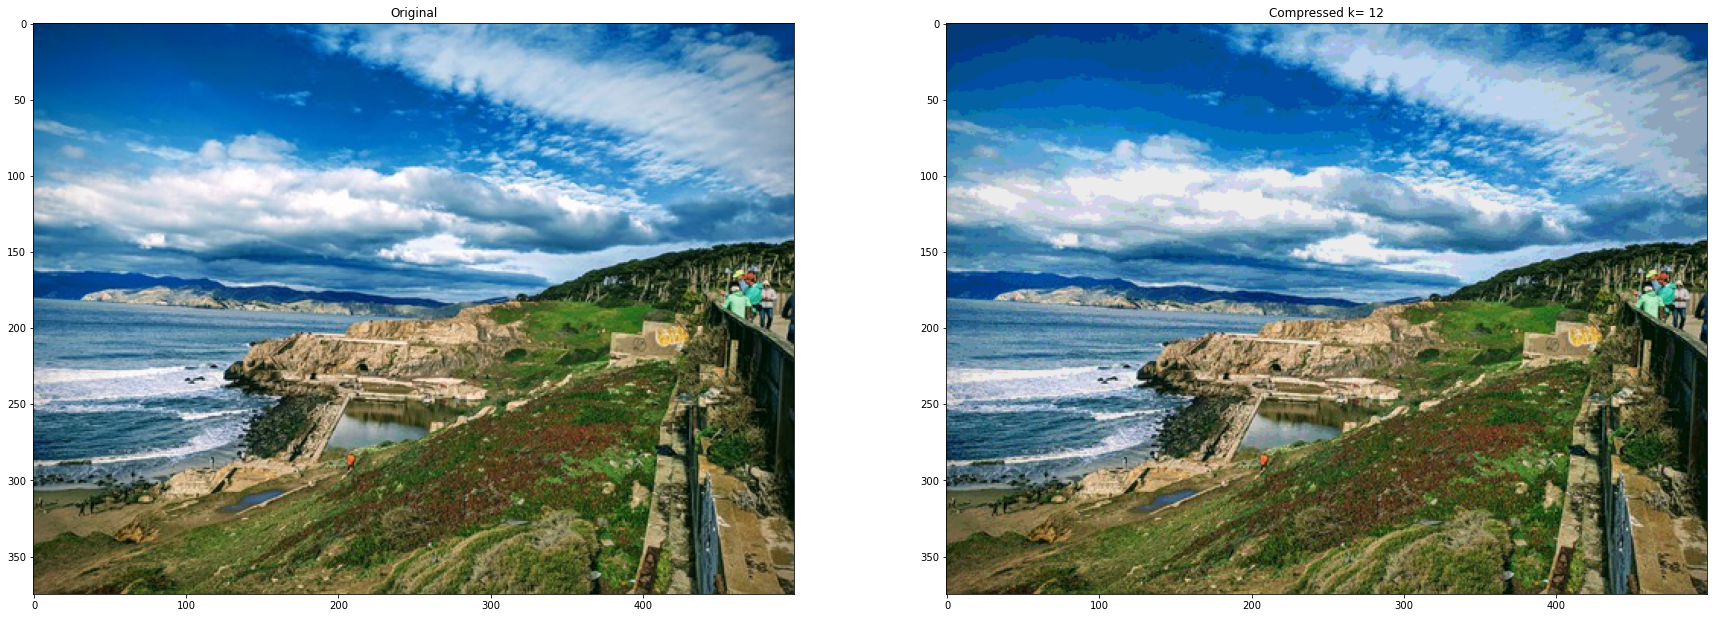

In [3]:
im_frame = Image.open('data/ocean_beach.jpg')
X = np.array(im_frame)
h, w,c = X.shape
X = X.reshape(-1,1)
k= 12
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] 

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,40))
ax1.imshow(np.array(im_frame))
ax2.imshow(X.reshape(h,w,3))    
ax1.title.set_text('Original')
ax2.title.set_text(f'Compressed k= {k}')

The image looks surprisingly similar and it's very hard to perceive the difference with a brief look. It took only 12 different pixel values to show the image with  562,500 different pixel values. The kmean++ algorithm performed incredibly well given the fact the image had high contrast. Let's check it on another picture having comparatively low contrast in color than the image above. The image is of Monalisa([credit](https://www.revolutiondatasystems.com/blog/grayscale-or-bitonal-which-is-a-better-method-for-scanning-my-records))

**Example-2**

In [4]:
im_frame = Image.open('data/Mona_Lisa_GS2.jpeg').convert('L')
X = np.array(im_frame)
h, w = X.shape
k= 8
X = X.reshape(-1,1)
centroids, labels = kmeans(X.reshape(-1,1), k=k, centroids='kmeans++', tolerance=.01)
X = centroids[labels] 

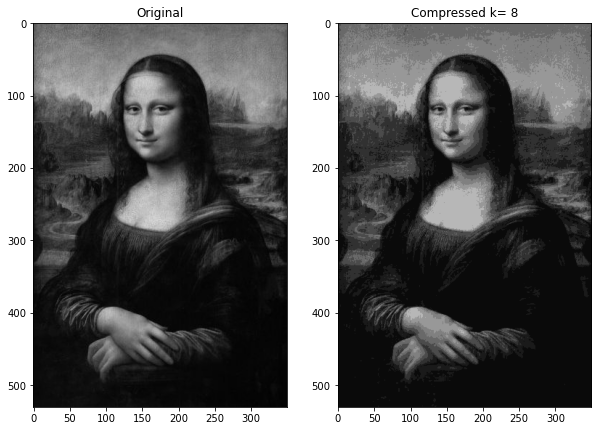

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,70))
img = cv2.cvtColor(np.array(im_frame), cv2.COLOR_BGR2RGB)
img_after = cv2.cvtColor(X.reshape(h,w), cv2.COLOR_BGR2RGB)
ax1.imshow(img)
ax2.imshow(img_after)    
ax1.title.set_text('Original')
ax2.title.set_text('Compressed k= 8')

Wow! It only took 8 different pixel colors to recreate the image of size 530 `*`350. The good part is that the clusters are able to pick minute details like the small pathways behind Monalisa. 

### When kmeans Clustering fails

**1. Not Robust to Outliers**

Since the k-means clustering tries to minimize the within-cluster difference, it makes it very vulnerable to outliers. Here is one such example where we currupted the data with outlier.

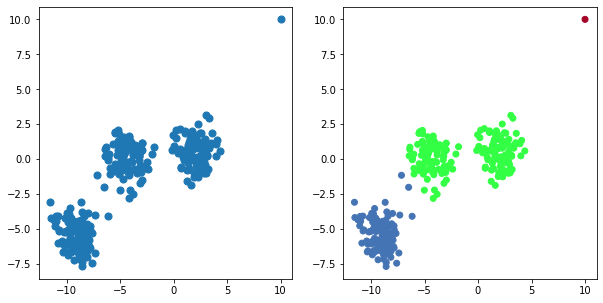

In [6]:
n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X = np.append(X, np.array([10.0, 10.0]).reshape(-1,1)).reshape(301,2)

centroids, labels = kmeans(X, 3, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227','#33FF44'])
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.scatter(X[:,0], X[:,1],s=50)
ax2.scatter(X[:,0], X[:,1], c=colors[labels])

As we can see here, k-means++ algorithm is not robust to outliers and failed to appropriately locate the three clusters in the data. It picked the extreme point as one of the clusters in the data.\
**Possible solution:** Currently, we are using euclidean distance to measure the similarity between data points. Instead, we can use distances that are robust to outliers

**2. Uneven Size of Clusters**

As mentioned in the above comment that k-means tries to minimize the within-cluster difference, k-means fails to capture the relationship when the cluster size is uneven. In the below example, we picked three samples with sizes 200, 50, and 15. Let's see how the cluster performs.

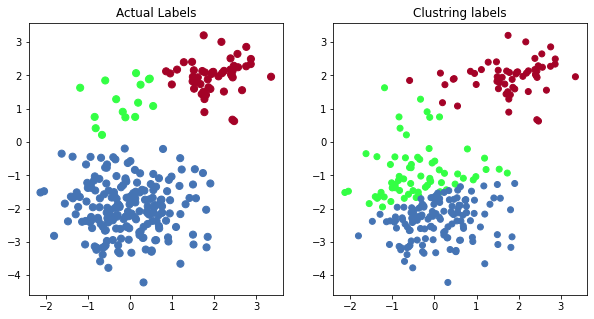

In [7]:
X, y = make_blobs(n_samples=[200, 50,15],
                  centers=[[0.0, -2.0], [2.0, 2.0],[0, 1.2]],
                  cluster_std=[0.8, 0.5, 0.5],
                  random_state=0, shuffle=False)

centroids, labels = kmeans(X, 3, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227','#33FF44'])
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.scatter(X[:,0], X[:,1],s=50, c=colors[y])
ax2.scatter(X[:,0], X[:,1], c=colors[labels])
ax1.title.set_text('Actual Labels')
ax2.title.set_text('Clustring labels')

Here to minimize the total within-cluster sum of the square, the K-means algorithm gave more weight to appropriately labeling the larger cluster and tried to split up the larger cluster to reduce the overall difference.\
**Possible solution:** For such cases agglomerative clustering techniques like Single Link or Complete Link Algorithms might perform better than k-mean clustering

**3. Incapability to separate clusters that are non-linearly separable**

One of the major drawbacks of k-means is its incapability to separate clusters that are non-linearly separable. Here is one such example of data distributed in the form of concentric circles.  

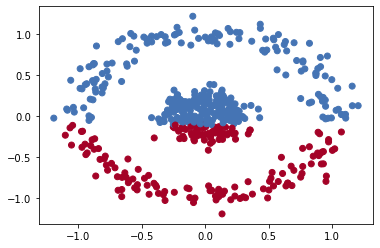

In [8]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

from the results we can see that it failed to recognize two groups. In general the kmeans fails to separate  highly non convex clusters.\
**Possible solution:** Spectral clustering 

### Spectral Clustering

Spectral clustering is used to separate the clusters that are highly nonconvex or when the center or spread does not suitably give the description of the cluster. This algorithm uses the affinity matrix to group similar data points. It uses the eigenvalues of the similarity matrix to perform dimensionality reduction before clustering the data. We used Breiman's random forest to compute the affinity matrix.

**Breiman Random Forest to compute affinity matrix**

Random Forests can be used to compute the affinity matrix by turning the unsupervised problem to supervised problem. The affinity matrix is computed by counting how often x<sup>(i)</sup>, x<sup>(j)</sup> are falling in the same leaf. This is then normalized by a number of trees. The affinity matrix is symmetric, positive definite and bounded above by 1, with the diagonal elements equal to 1. 

Below are the steps to be followed to get the affinity matrix

    1. Consider the given records as class 0
    2. Duplicate and Bootstrap columns of X to generate X'. Label X' as 1
    3. Train random forest on the stack [X,X']
    4. Walkthrough leaves of all the trees and computes the proximity[i,j] by incrementing the count for pairs falling in the same leaf.
    5. Divide the proximity matrix by the number of trees to get the normalized values

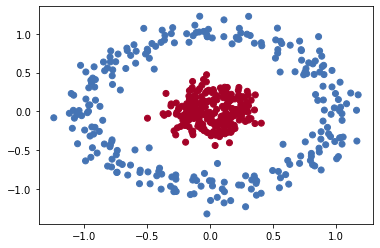

In [10]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
labels, similarity = get_labels(X, n_estimators =500)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

Voilà!! The spectral clustering is able to perfectly separate the non-linearly separable clusters. It put the concentric circles into different clusters which k-means failed to perform.

### Summary

In this report we explored how kmeans works. Further we looked at kmean++ algorithm for cluster initialization. We then explored the real life applications such as Image Compression. Kmeans++ have some limitations such as it is not robust to outliers, fails to cluster properly when cluster size is uneven and incapable of separating clusters that are non-linearly separable. We further explored Spectral clustering to solve cluster that are non-convex like concentring circles.